# Logistic regression with sklearn

## lets Begining with Admittance Simple Linear Regression

In [1]:
# import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
import numpy as np

In [2]:
# import dataset 2.01. Admittance

dataset = pd.read_csv("2.01. Admittance.csv")
dataset

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [3]:
# copy the dataset into variable df

df = dataset.copy()
df

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
# change the dummy variable in the dataset using the map method

admitted_map = {"No":0, "Yes":1}

df.Admitted = df.Admitted.map(admitted_map)
df

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [5]:
# change the dummy variable in dataset using sklearn 

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset["Admitted"] = encoder.fit_transform(dataset["Admitted"])

In [6]:
# select your x and y

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


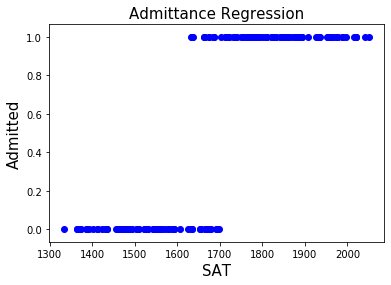

In [7]:
# plot the data

plt.scatter(x,y, c="blue")
plt.xlabel("SAT", fontsize=15)
plt.ylabel("Admitted", fontsize = 15)
plt.title("Admittance Regression", fontsize = 15)
plt.show();

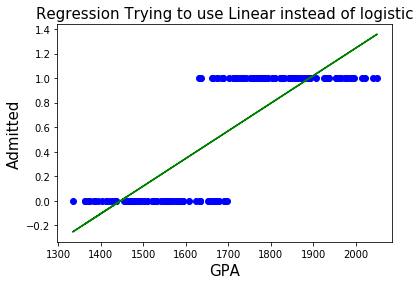

In [8]:
# first, make a plot with linear regression

xh = sm.add_constant(x)

regressor = sm.OLS(y, xh)
regressor = regressor.fit()

yh = x*regressor.params[1] + regressor.params[0]

plt.scatter(x,y, c="blue")
plt.plot(x,yh,c="green")
plt.title("Regression Trying to use Linear instead of logistic", fontsize=15)
plt.xlabel("GPA", fontsize=15)
plt.ylabel("Admitted", fontsize = 15)
plt.show();

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


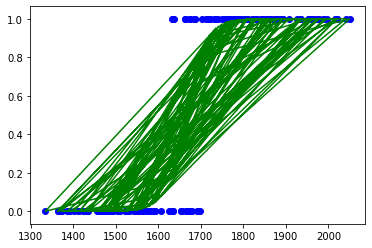

In [9]:
# fit the data with logistic regression

reg_log = sm.Logit(y,xh)
result_log = reg_log.fit()



# create a calculation function

def f(xh,b0,b1):
    return np.array(np.exp(b0+xh*b1) / (1 + np.exp(b0+xh*b1)))

f_sorted = np.sort(f(x, result_log.params[0], result_log.params[1]))
x_sorted = np.sort(np.array(x))



# plot the graph of the logistic regression
plt.scatter(x,y,c="blue")
plt.plot(x_sorted, f_sorted, c="green")
plt.show();


In [10]:
# check the summary of the regression

result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.7992
Time:                        08:36:41   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
x1             0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
# show predictions from the result_log model
# make good readerbility, set the print options

np.set_printoptions(formatter = {"float": lambda x: "{:.0f}".format(x)})


# show the result

result_log.predict().round()

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [12]:
# create confusion matrix using statsmodels


result_log.pred_table()

array([[67, 7],
       [7, 87]])

In [13]:
# To calculate the accuracy of the sm confussion matrix above
# create a dataframe for the matrix above

c_accuracy = pd.DataFrame(result_log.pred_table())
c_accuracy.columns = ["Predicted_0", "Predicted_1"]
c_accuracy = c_accuracy.rename(index = {0:"Actual 0",1:"Actual 1"})
c_accuracy

,Predicted_0,Predicted_1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


In [14]:
# the accuracy

acc = np.array(c_accuracy)
accuracy_sm = (acc[0,0]+acc[1,1])/acc.sum()

accuracy_sm

0.9166666666666666

In [15]:
#create confusion matrix using sklearn.metric and print the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y,result_log.predict().round()))

print(accuracy_score(y,result_log.predict().round()))

[[67  7]
 [ 7 87]]
0.9166666666666666


# Working with multiple logistic regression :: Bank Data

In [16]:
# read the dataset 13.1 Bank_data

bankdata = pd.read_csv("13.1 Bank_data.csv")
bankdata = bankdata.drop("Unnamed: 0", axis=1)
bankdata

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [17]:
df = bankdata.copy()

from sklearn.preprocessing import LabelEncoder

df["y"] = LabelEncoder().fit_transform(df["y"])
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
y


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [18]:
# fit the dataset with the statsmodels

xh = sm.add_constant(x)

reg_log = sm.Logit(y,xh)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.335942
         Iterations 7


In [19]:
# chech the summary

result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      511
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.5153
Time:                        08:36:49   Log-Likelihood:                -174.02
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 7.579e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1385      0.339     -0.408      0.683      -0.804       0.527
x1            -0.7802      0.092     -8.471      0.000      -0.961      -0.600
x2             2.4028      1.090      2.205      0.027       0.267       4.538
x3            -1.8097      0.332     -5.459      0.000      -2.459      -1.160
x4             0.1946      0.229      0.849      0.396      -0.255       0.644
x5             1.2746      0.583      2.186      0.029       0.132       2.417
x6             0.0070      0.001      9.386      0.000       0.006       0.008
==============================================================================
"""

In [20]:
# checing the prediction

result_log.predict()

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [21]:
# find the confussion matrix using the sklearn

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y,result_log.predict().round()))
print(accuracy_score(y, result_log.predict().round()))

[[220  39]
 [ 31 228]]
0.8648648648648649


In [29]:
# create the confusion matrix and accuracy score using the statsmodels
#check the confusion matrix

result_log.pred_table()

array([[220, 39],
       [31, 228]])

In [23]:
# create a database table for the m_table above

accu = pd.DataFrame(result_log.pred_table())
accu.columns = ["Prediction 0", "Prediction 1"]
accu  = accu.rename(index = {0:"Actual 0", 1:"Actual 1"})
accu

,Prediction 0,Prediction 1
Actual 0,220.0,39.0
Actual 1,31.0,228.0


In [24]:
#create the accuracy using statsmodels

acc = result_log.pred_table()
accuracy = (acc[0,0]+acc[1,1])/acc.sum()
accuracy

0.8648648648648649

In [25]:
# testing my model
#importing a new dataset

new_data = pd.read_csv("16.1 Bank_data_testing.csv")
new_data = new_data.drop("Unnamed: 0", axis=1)
new_data

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [26]:
from sklearn.preprocessing import LabelEncoder

ndf = new_data.copy()

ndf["y"] = LabelEncoder().fit_transform(ndf["y"])
ndf

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


In [27]:
# seperate variable

nx = ndf.iloc[:,:-1].values
ny = ndf.iloc[:,-1].values


In [28]:
# Predicting the new dataset

nxh = sm.add_constant(nx)
result_log.predict(nxh)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1])

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(ny,result_log.predict(nxh).round()))
accuracy_score(ny,result_log.predict(nxh).round())

[[94 17]
 [12 99]]


0.8693693693693694

In [46]:
moon = pd.DataFrame(data = result_log.predict(nxh).round(), columns =["Precidtion"])
moon["Test"] = ny
moon.head(50)

,Precidtion,Test
0,1.0,0
1,0.0,0
2,0.0,0
3,1.0,1
4,0.0,0
5,0.0,0
6,1.0,1
7,1.0,0
8,1.0,1
9,0.0,0
